In [ ]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

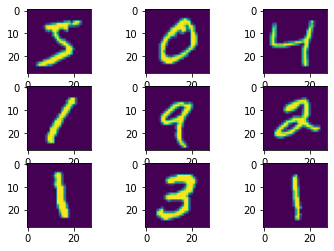

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train=x_train.astype('float32') #chuyen kdl tu 0-255 -> 0-1
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
from tensorflow.keras.utils import to_categorical as tcg
y_train=tcg(y_train,10)
y_test=tcg(y_test,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Activation,Dropout,Dense,Flatten


In [ ]:
from keras.layers.pooling import MaxPooling2D
model=Sequential()
model.add(Conv2D(28,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(28,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
#from keras.backend import categorical_crossentropy
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test),verbose=1)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


938/938 [==============================] - 16s 17ms/step - loss: 0.1421 - accuracy: 0.9543 - val_loss: 0.0333 - val_accuracy: 0.9892
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0270 - val_accuracy: 0.9916
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0226 - val_accuracy: 0.9928
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0287 - val_accuracy: 0.9903
Epoch 5/10
938/938 [==============================] - 15s 17ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0237 - val_accuracy: 0.9922
Epoch 6/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0260 - val_accuracy: 0.9922
Epoch 7/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0252 - val_accuracy: 0.9930
Epo

In [ ]:
model.save('cnn_mnist.h5')

In [ ]:
from keras.models import load_model
model5=load_model('cnn_mnist.h5')

In [ ]:
import numpy as np
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import load_img
import cv2


ValueError: ignored

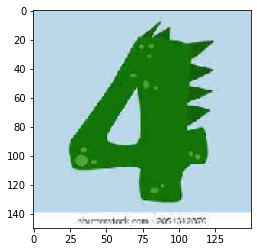

In [ ]:
img=load_img('/content/so4.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
img=img.astype('float32')
np.argmax(model.predict(img),axis=1)